In [1]:
# import the necessary libraries for data manipulation visualization and numerical operations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('bank.csv') # reads the CSV file
df.head() # displays the first few rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.tail() # displays the last few rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [4]:
df.shape #  prints the shape (the number of rows and columns)

(11162, 17)

In [5]:
df.columns #  prints the column names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.dtypes # displays the data types of each column

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [7]:
df.dtypes.value_counts() # counts the number of columns with each data type

object    10
int64      7
Name: count, dtype: int64

In [8]:
df.info() # provides a summary of the df including column names and data types and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.duplicated().sum() # calculates the number of duplicated rows

0

In [10]:
df.isna().sum() # calculates the number of missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
cat_cols = df.select_dtypes(include='object').columns # identify the categorical columns in the df and store their column names in the variable cat_cols
print(cat_cols) 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [12]:
num_col = df.select_dtypes(exclude='object').columns # identify the numerical columns in the df and store their column names in the variable num_col
print(num_col) 

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [13]:
df.describe() # provides descriptive statistics for the numerical columns

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [14]:
df.describe(include='object') # provides descriptive statistics for the categorical columns

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


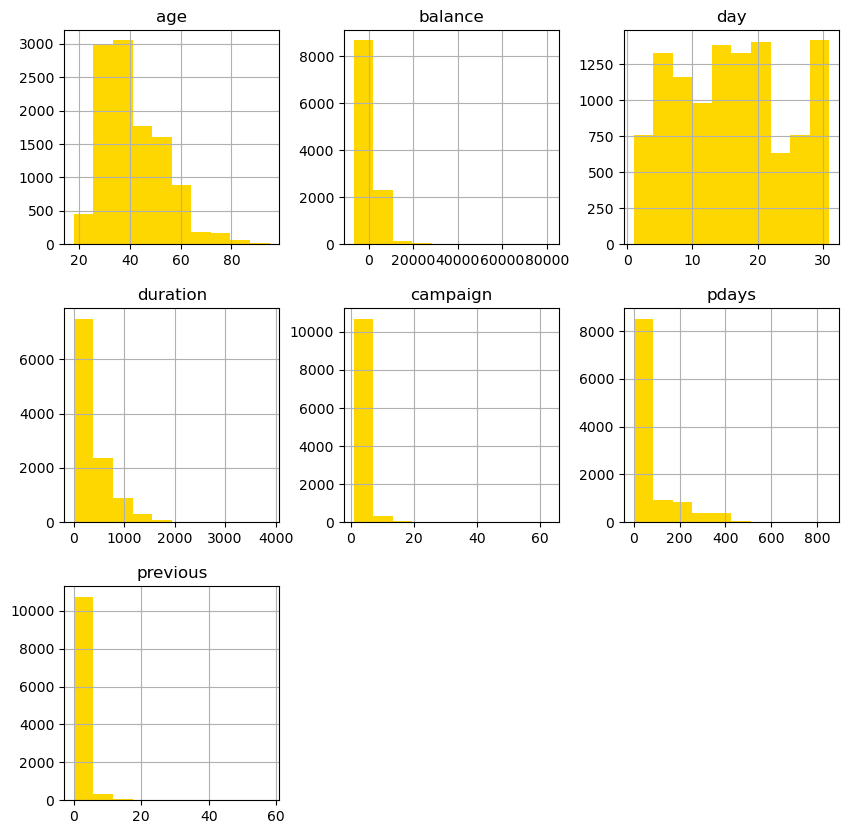

In [15]:
df.hist(figsize=(10,10),color='gold') # create histograms for each numerical column in the df and display them using matplotlib and seaborn
plt.show()

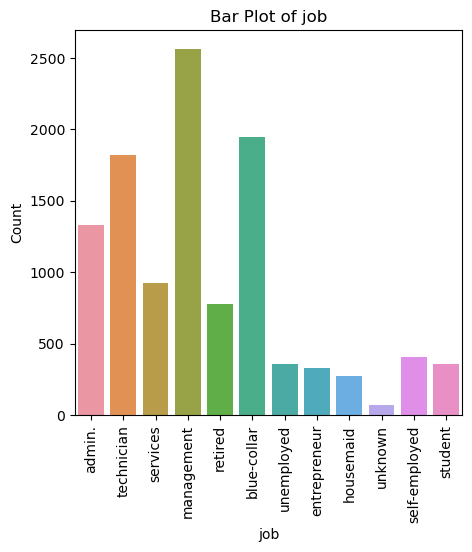

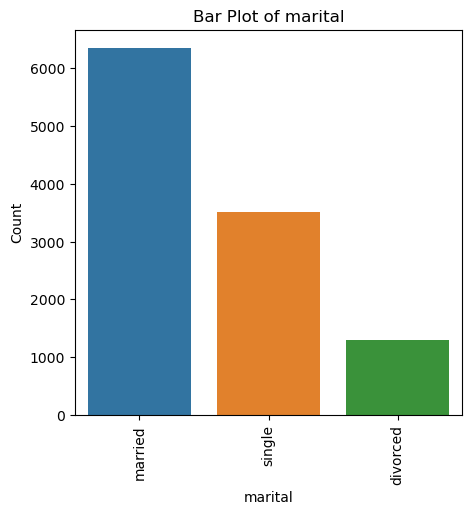

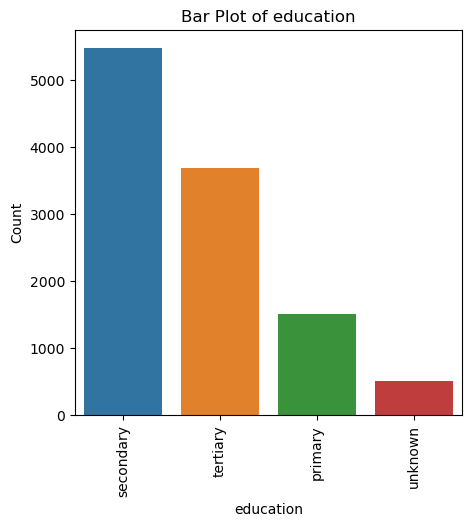

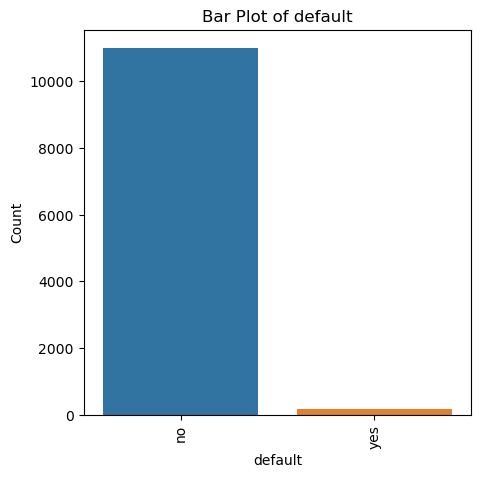

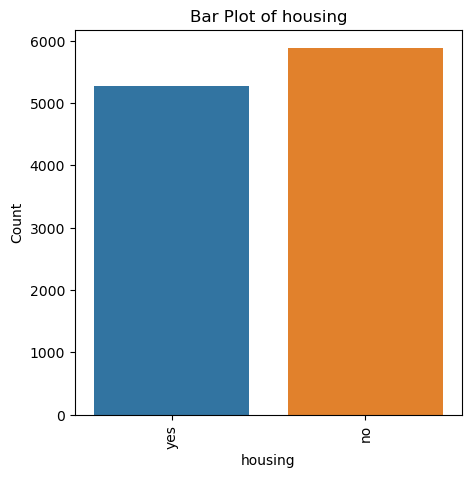

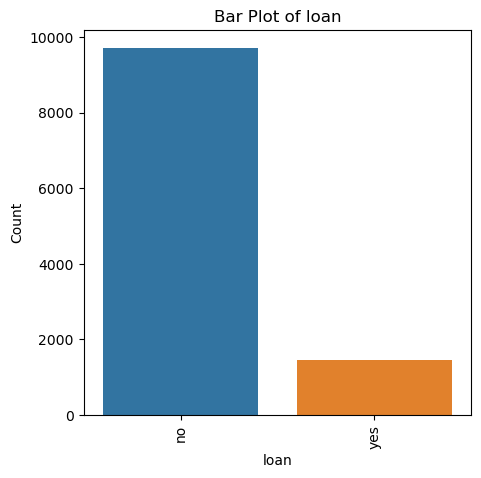

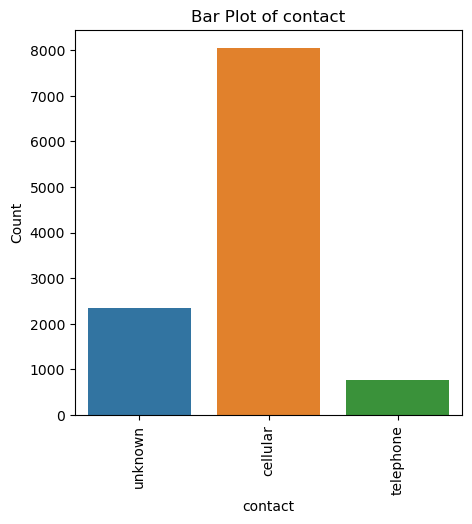

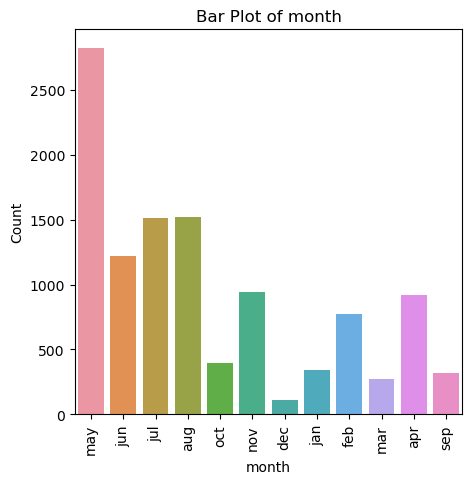

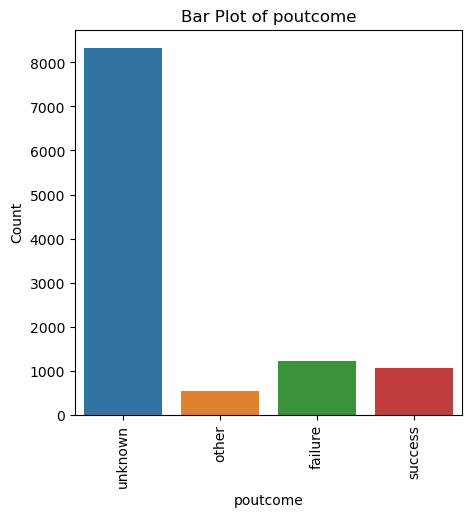

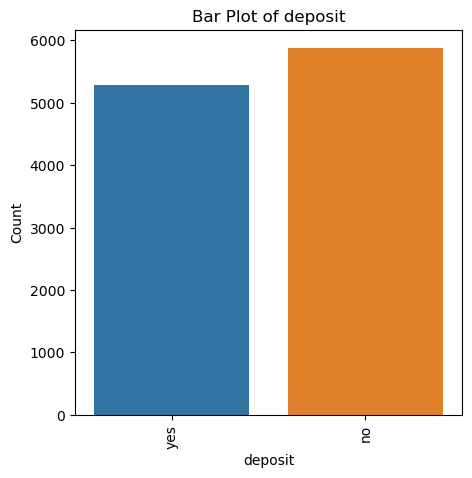

In [16]:
# This loop creates bar plots for each categorical column in the df using 
# seaborn , it displays the count of each category
for feature in cat_cols :
    plt.figure(figsize=(5,5)) #Adjust the figure size as needed
    sns.countplot(x=feature , data=df )
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [17]:
df1=df.copy() #  creates a copy of the df
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [18]:
df1.shape

(11162, 17)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#  The LabelEncoder is used to encode categorical variables 
# into numerical values The apply method applies the fit_transform
# method of LabelEncoder to each column in the DataFrame df1 resulting in a new DataFrame named df_encoded with encoded values
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform) 
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0,0


In [21]:
df_encoded['deposit'].value_counts() # counts the number of occurrences of each unique value in the deposit column

deposit
0    5873
1    5289
Name: count, dtype: int64

In [22]:
x = df_encoded.drop('deposit',axis=1) # independent var
y = df_encoded['deposit'] # dependent var
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(11162, 16)
(11162,)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
print(11162*0.25)

2790.5


In [25]:
# split the data into trainingand testing sets using the train_test_split
# function from sklearn.model_selection it assigns 75% of the data
# to the training set (x_train and y_train) and 25% to the testing set
# (x_test and y_test) it also prints the shapes of the training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8371, 16)
(2791, 16)
(8371,)
(2791,)


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [27]:
# defines a function evaluation_model that takes the true values
# y_test and predicted values y_pred as inputs it calculates the
# accuracy score confusion matrix and classification report and prints them
def evaluation_model(y_test,y_pred) :
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy Score" , accuracy)
    cm = confusion_matrix(y_test,y_pred)
    print("confusion_matrix\n" ,cm)
    print("Classification Report",classification_report(y_test,y_pred))

# defines a function modelscore that takes a model as input it 
# calculates and prints the training and testing scores of the model    
def modelscore(model) :
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print("Training Score",train_score)
    print("Training Score",test_score)

In [28]:
 from sklearn.tree import DecisionTreeClassifier

In [29]:
# create a decision tree classifier object dt, and fit it on the
# training data it then calculates and prints the training and testing
# scores of the model next it makes predictions on the testing data
# and evaluates the model using the evaluation_model function
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [30]:
modelscore(dt)

Training Score 0.8175845179787361
Training Score 0.8007882479398065


In [31]:
ypred_dt = dt.predict(x_test)
ypred_dt

array([0, 0, 0, ..., 0, 1, 0])

In [32]:
evaluation_model(y_test,ypred_dt)

Accuracy Score 0.8007882479398065
confusion_matrix
 [[1078  379]
 [ 177 1157]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.74      0.79      1457
           1       0.75      0.87      0.81      1334

    accuracy                           0.80      2791
   macro avg       0.81      0.80      0.80      2791
weighted avg       0.81      0.80      0.80      2791



In [33]:
from sklearn.tree import plot_tree

In [34]:
# import the plot_tree function from sklearn.tree and visualize the
# decision tree using the plot_tree function it also specifies the
# feature names and class names for better visualization and displays the tree
class_names = ['no','yes']
features_names = x_train.columns
print(features_names)
print(class_names)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


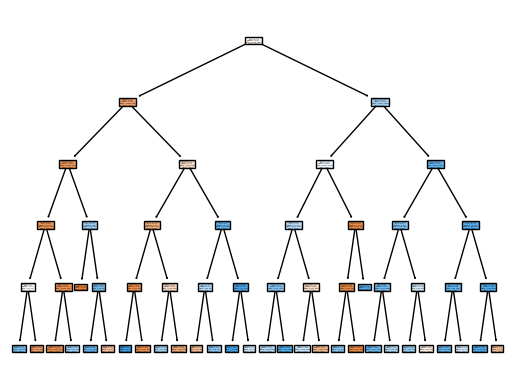

In [35]:
featu_names = df.columns.tolist()
cl_names = ["class_0","class_1"]
plot_tree(dt,feature_names=featu_names,class_names=cl_names,filled=True)
plt.show()

In [36]:
# create and fit another decision tree classifier dt1 with different
# hyperparameters it calculates and prints the training and testing
# scores of dt1 it then makes predictions on the testing data and
# evaluates the model using the evaluation_model function
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [37]:
modelscore(dt1)

Training Score 0.785210846971688
Training Score 0.7721246864922967


In [38]:
ypred_dt1 = dt1.predict(x_test)

In [39]:
evaluation_model(y_test,ypred_dt1)

Accuracy Score 0.7721246864922967
confusion_matrix
 [[1138  319]
 [ 317 1017]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1457
           1       0.76      0.76      0.76      1334

    accuracy                           0.77      2791
   macro avg       0.77      0.77      0.77      2791
weighted avg       0.77      0.77      0.77      2791



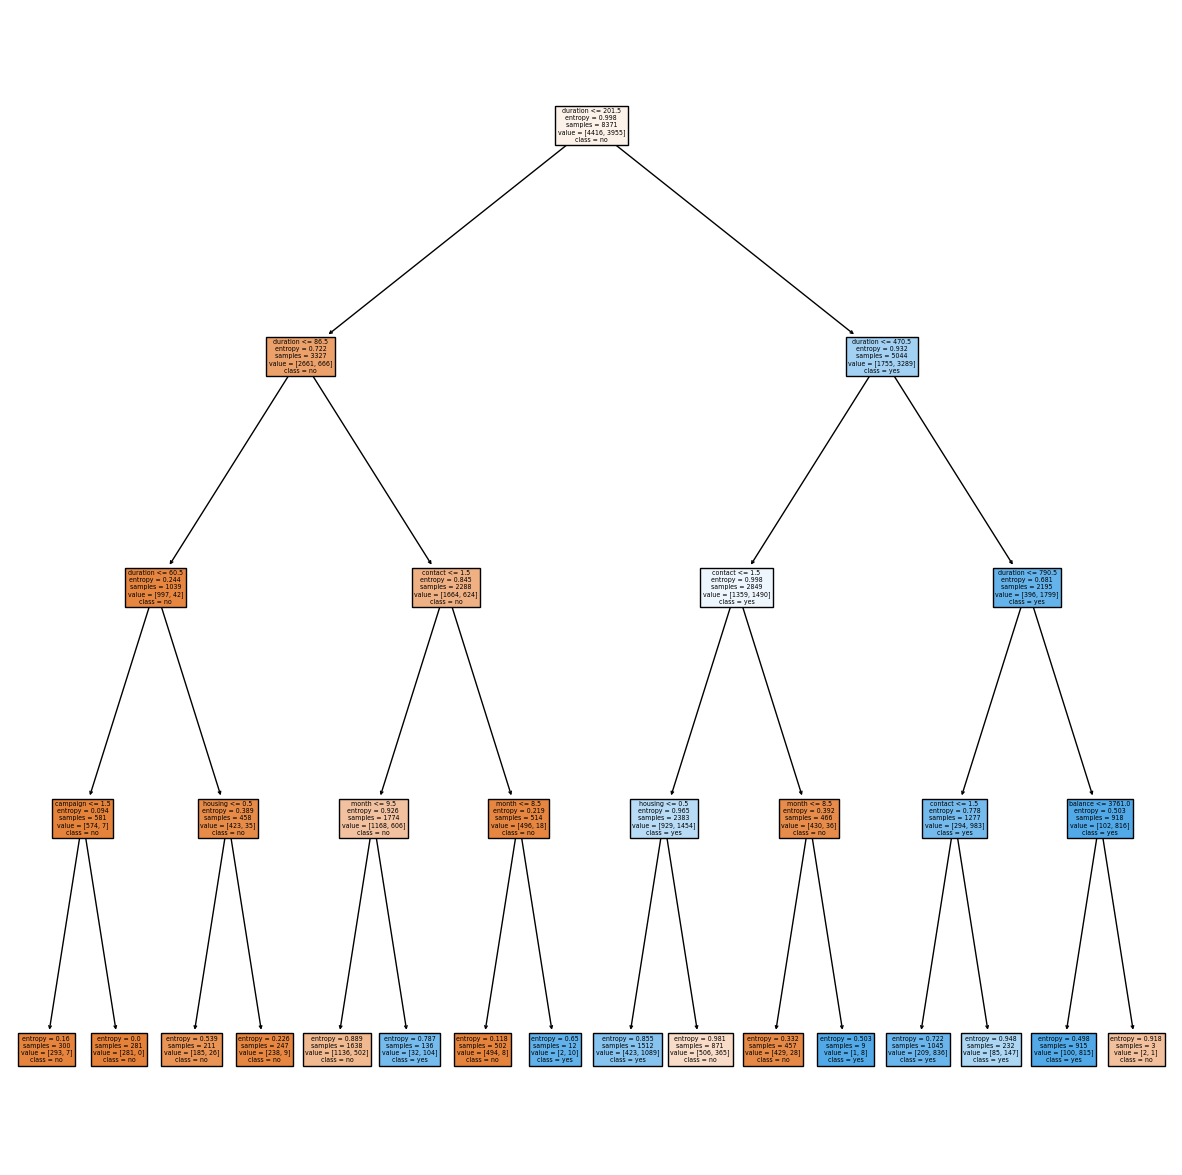

In [40]:
plt.figure(figsize=(15,15))
plot_tree(dt1,feature_names=features_names.tolist(),class_names=class_names,filled=True)
plt.show()